<a href="https://colab.research.google.com/github/Cintia-93/TP-Big-Data/blob/main/BigData_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import os
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

## Preparacion y depuracion del archivo

In [111]:
# Colocar la ruta de la carpeta que contiene los archivos
ruta_de_acceso = '/content/drive/MyDrive/UNI/Big Data/Clase 3'

archivos = os.listdir(ruta_de_acceso)
archivos

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

dataframes = {}

for archivo in archivos:
    if archivo.endswith('.csv'):  # Asegurarse de que solo se consideren archivos CSV
        mes = archivo.split('_')[3].split('.')[0]  # Obtener el nombre del archivo sin la extensión
        ruta_completa = os.path.join(ruta_de_acceso, archivo)  # Ruta completa al archivo
        df = pd.read_csv(ruta_completa)  # Cargar el archivo CSV en un DataFrame
        df_ventas = df.copy()

        df_ventas['Cantidad Pedida'] = pd.to_numeric(df_ventas['Cantidad Pedida'], errors='coerce')  #El errors= 'coerce' transforma los valores no numericos a NaN'
        df_ventas['Precio Unitario'] = pd.to_numeric(df_ventas['Precio Unitario'], errors='coerce')


        df_ventas = df_ventas.loc[~df_ventas['Cantidad Pedida'].isna()]
        df_ventas = df_ventas.loc[~df_ventas['Precio Unitario'].isna()]

        # Elimino todos los Nan y me quedo solo con los valores numericos
        df_ventas = df_ventas.dropna()

        # Transformo todos los valores numericos al tipo de dato int
        df_ventas['Cantidad Pedida'] = df_ventas['Cantidad Pedida'].astype(int)
        df_ventas['Precio Unitario'] = df_ventas['Precio Unitario'].astype(float)

        dataframes[mes] = df_ventas  # Agregar el DataFrame al diccionario usando el nombre del mes

In [112]:
def extraer_datos(datos):
  datos['Fecha de Pedido'] = pd.to_datetime(datos['Fecha de Pedido'], format='%m/%d/%y %H:%M')
  datos['Hora'] = datos['Fecha de Pedido'].dt.hour
  datos['Dia'] = datos['Fecha de Pedido'].dt.day
  return datos

  dataframe_mes = extraer_datos(dataframe_mes)

# 1. Comportamiento de las ventas en los distintos meses:

## ¿Cómo variaron las ventas a lo largo de los diferentes meses?

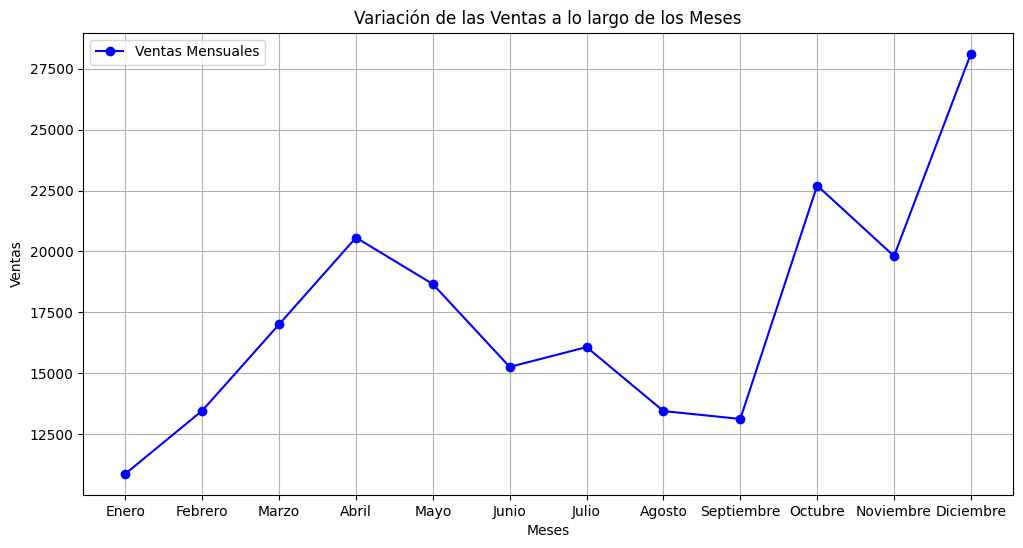

In [113]:
# Crear una lista para almacenar las ventas totales de cada mes
ventas_mensuales = []

for mes in meses:
    if mes in dataframes:
        df = dataframes[mes]
        ventas_mensuales.append(df['Cantidad Pedida'].sum())
    else:
        ventas_mensuales.append(0)  # Si no hay datos para el mes, agregar 0 como ventas

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))  # Tamaño de la figura
plt.plot(meses, ventas_mensuales, marker='o', linestyle='-', color='b', label='Ventas Mensuales')
plt.title('Variación de las Ventas a lo largo de los Meses')
plt.xlabel('Meses')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

## ¿Hubo algún mes que se destacó en términos de ventas?

In [114]:
max_ventas_mes = meses[ventas_mensuales.index(max(ventas_mensuales))]
max_ventas = max(ventas_mensuales)

print(f"El mes con mayores ventas fue {max_ventas_mes} con un total de ventas de {max_ventas}")

El mes con mayores ventas fue Diciembre con un total de ventas de 28121


## ¿Cuál es el ingreso total generado por mes?

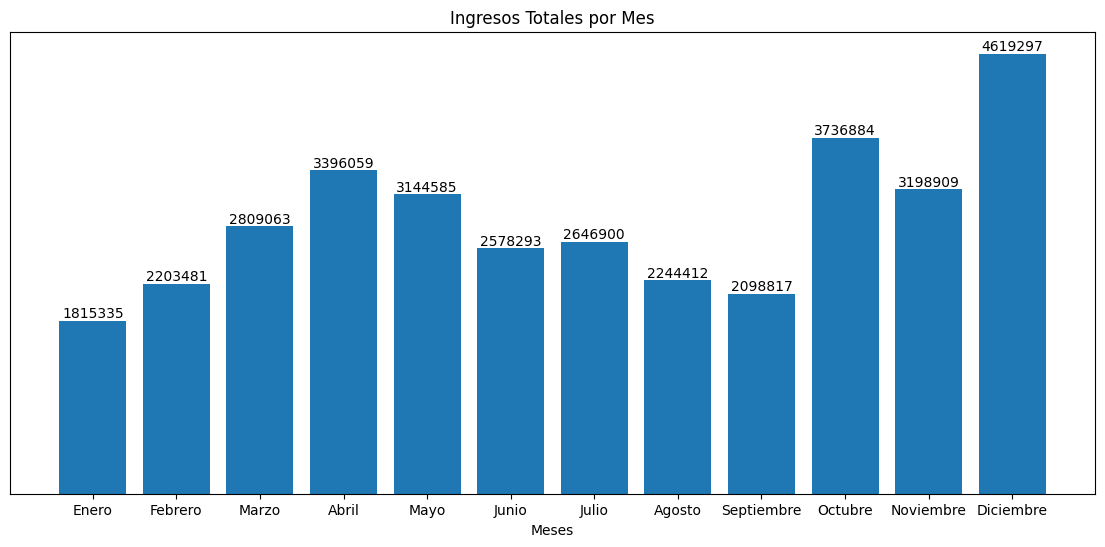

In [115]:
# Datos para los ingresos totales por mes
ingreso_total_por_mes = []

for mes in meses:
    if mes in dataframes:
        df = dataframes[mes]
        ingreso_total = (df['Cantidad Pedida']*df['Precio Unitario']).sum()
        ingreso_total_por_mes.append(ingreso_total)
    else:
        ingreso_total_por_mes.append(0)

# Crear el gráfico de barras para ingresos totales por mes
plt.figure(figsize=(14, 6))
bars = plt.bar(meses, ingreso_total_por_mes)
plt.title('Ingresos Totales por Mes')
plt.xlabel('Meses')
plt.ylabel('Ingresos')
plt.grid(False)

# AgregaMos etiquetas de valor en la parte superior de cada barra
for bar, ingreso in zip(bars, ingreso_total_por_mes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{ingreso:.0f}', ha='center', va='bottom')

# Eliminar los números del eje y
plt.gca().axes.get_yaxis().set_visible(False)

# Mostrar el gráfico
plt.show()

# 2. Optimización de la publicidad y patrón de ventas por hora:

## ¿Cuál es el momento ideal del día para presentar la publicidad y aumentar la probabilidad de compra?

### Proyeccion Anual

In [116]:
Horas = list(range(24))

# Creo el objeto figura
fig = go.Figure()

for mes in meses:
    dataframe_mes = dataframes[mes]
    dataframe_mes = extraer_datos(dataframe_mes)  # Reemplaza esto con el procesamiento que necesites
    Ventas_por_hora = dataframe_mes.groupby('Hora')['Cantidad Pedida'].count()

    # Agrego al objeto figura un gráfico de línea con las horas y las ventas por hora
    fig.add_trace(go.Scatter(
        x=Horas,
        y=Ventas_por_hora,
        mode='lines',
        name=mes,
        line=dict(width=2,shape='spline'),
    ))

# Configuro los ejes y los títulos
fig.update_layout(
    title="Unidades vendidas por hora en diferentes meses",
    xaxis=dict(title="Hora", tickvals=Horas),
    yaxis=dict(title="Unidades vendidas", side="left"),
    legend=dict(y=0.3, yanchor='bottom'),
)

fig.show()

In [117]:
Horas = list(range(24))

# Creo el objeto figura
fig = go.Figure()
horas_analizadas = [19, 12, 16]

for hora in horas_analizadas:
    total_productos_vendidos = []

    for mes in meses:
        dataframe_mes = dataframes[mes]
        dataframe_mes = extraer_datos(dataframe_mes)  # Reemplaza esto con el procesamiento que necesites

        ventas_hora = dataframe_mes[dataframe_mes['Hora'] == hora]

        # Calcular la cantidad total de productos vendidos para la hora actual
        total_productos_vendidos.append(ventas_hora['Cantidad Pedida'].count())

    # Agrego al objeto figura un gráfico de línea con las horas y las ventas por hora
    fig.add_trace(go.Scatter(
        x=meses,
        y=total_productos_vendidos,
        mode='lines',
        name=f'{hora} horas',
        line=dict(width=2, shape='spline'),
    ))

# Configuro los ejes y los títulos
fig.update_layout(
    title="Unidades vendidas por hora",
    xaxis=dict(title="Meses", tickvals=Horas),
    yaxis=dict(title="Unidades vendidas", side="left"),
    legend=dict(y=0.3, yanchor='bottom'),
)

fig.show()


In [118]:
def graficar_unidades_Vendidas_por_hora(datos):
    horas = list(range(24))
    ventas_por_hora = datos.groupby('Hora')['Cantidad Pedida'].sum()

    #Crear el objeto figura
    fig = go.Figure()

    fig.add_trace(go.Scatter(
            x = horas,
            y= ventas_por_hora,
            name = 'Ventas por hora',
            line = dict(color= 'Red'),
            )
    )

    fig.update_layout(
        title = 'Unidades Vendidas por hora - Enero',
        xaxis = dict(title='Hora', tickvals=horas),
        yaxis = dict(title='Unidades Vendidas',side='left'),
    )

    fig.show()

In [119]:
def df_desglosado(datos):
    df_direccion = datos['Dirección de Envio'].str.split(', ', expand = True)
    df_direccion.columns = ['Calle', 'Ciudad', 'PO BOX']
    df_direccion[['Estado', 'Cod Postal']] = df_direccion['PO BOX'].str.split(' ', expand = True)
    df_ventas_enero_desglosado = pd.concat([datos, df_direccion], axis = True)
    return df_ventas_enero_desglosado

In [120]:
def graficar_ventas_por_estado(datos):
    ventas_por_estado = datos.groupby('Estado')['Cantidad Pedida'].sum()
    ventas_por_estado = ventas_por_estado.reset_index(inplace = False)

    #Crear el objeto figura
    fig = px.choropleth(ventas_por_estado, locations = 'Estado', locationmode = 'USA-states', color = 'Cantidad Pedida',
                        color_continuous_scale = 'RdYlGn',
                        scope = "usa",
                        title = 'Ventas por Estado'
    )

    fig.show()

In [121]:
def graficar_productos_vendidos(datos):

    #Agrupo los productos
    Productos_vendidos_enero= datos.groupby('Producto')['Cantidad Pedida'].sum()
    Productos_vendidos_enero_ordenados = Productos_vendidos_enero.sort_values(ascending = False)

    df_Productos = pd.DataFrame({'Producto':Productos_vendidos_enero_ordenados.index, 'Cantidad Pedida': Productos_vendidos_enero_ordenados.values})

    #Muestro el producto más vendido en diciembre
    Productos = df_Productos['Producto']
    Unidades = df_Productos['Cantidad Pedida']

    #Creo el objeto figura
    fig = go.Figure()

    #Agrego grafico en mi objeto figura
    fig.add_trace(go.Bar(
            x = Productos,
            y= Unidades,
            name = 'Unidades Vendidas - Enero',
            marker = dict(color= 'light blue')
    )
    )

    return fig.show()

### ENERO

##### Optimización de la publicidad y patrón de ventas por hora según el mes

In [122]:
df_ventas_enero = dataframes['Enero']
graficar_unidades_Vendidas_por_hora(df_ventas_enero)

### FEBRERO

##### Optimización de la publicidad y patrón de ventas por hora según el mes

In [123]:
df_ventas_febrero = dataframes['Febrero']
graficar_unidades_Vendidas_por_hora(df_ventas_febrero)

### MARZO

#### Optimización de la publicidad y patrón de ventas por hora según el mes

In [124]:
df_ventas_marzo = dataframes['Marzo']
graficar_unidades_Vendidas_por_hora(df_ventas_marzo)

### ABRIL

#### Optimización de la publicidad y patrón de ventas por hora según el mes

In [125]:
df_ventas_abril = dataframes['Abril']
graficar_unidades_Vendidas_por_hora(df_ventas_abril)

### MAYO

#### Optimización de la publicidad y patrón de ventas por hora según el mes

In [126]:
df_ventas_mayo = dataframes['Mayo']
graficar_unidades_Vendidas_por_hora(df_ventas_mayo)

### JUNIO

#### Optimización de la publicidad y patrón de ventas por hora según el mes

In [127]:
df_ventas_junio = dataframes['Junio']
graficar_unidades_Vendidas_por_hora(df_ventas_junio)

### JULIO

#### Optimización de la publicidad y patrón de ventas por hora según el mes

In [128]:
df_ventas_julio = dataframes['Julio']
graficar_unidades_Vendidas_por_hora(df_ventas_julio)

### AGOSTO

#### Optimización de la publicidad y patrón de ventas por hora según el mes

In [129]:
df_ventas_agosto = dataframes['Agosto']
graficar_unidades_Vendidas_por_hora(df_ventas_agosto)

### SEPTIEMBRE

#### Optimización de la publicidad y patrón de ventas por hora según el mes

In [130]:
df_ventas_septiembre = dataframes['Septiembre']
graficar_unidades_Vendidas_por_hora(df_ventas_septiembre)

### OCTUBRE

#### Optimización de la publicidad y patrón de ventas por hora según el mes

In [131]:
df_ventas_octubre = dataframes['Octubre']
graficar_unidades_Vendidas_por_hora(df_ventas_octubre)

### NOVIEMBRE

#### Optimización de la publicidad y patrón de ventas por hora según el mes

In [132]:
df_ventas_noviembre = dataframes['Noviembre']
graficar_unidades_Vendidas_por_hora(df_ventas_noviembre)

### DICIEMBRE

#### Optimización de la publicidad y patrón de ventas por hora según el mes

In [133]:
df_ventas_diciembre = dataframes['Diciembre']
graficar_unidades_Vendidas_por_hora(df_ventas_diciembre)

## ¿Cómo cambian los patrones de ventas por hora a lo largo del año?

In [134]:
#Transformo los valores de fecha y hora a un formato que se pueda analizar
horas = list(range(24))
ventas_por_hora = df_ventas.groupby('Hora')['Cantidad Pedida'].sum()


# Crear el objeto figura
fig = go.Figure()


fig.add_trace(go.Scatter(
        x = horas,
        y= ventas_por_hora,
        name = 'Ventas por hora',
        line = dict(color= 'Red'),

        )
)

fig.update_layout(
    title = 'Unidades Vendidas por hora',
    xaxis = dict(title='Hora', tickvals=horas),
    yaxis = dict(title='Unidades Vendidas',side='left'),


)

## ¿Hay modificaciones en los patrones de ventas durante las horas de mayor actividad en los distintos meses?

In [135]:
ventas_por_dia = df_ventas.groupby('Dia')['Cantidad Pedida'].sum()
dias= list(ventas_por_dia.index)

# Crear el objeto figura
fig = go.Figure()


fig.add_trace(go.Scatter(
        x = dias,
        y= ventas_por_dia,
        name = 'Ventas por dia',
        line = dict(color= 'Red',shape='spline',smoothing=1.3,width=3),

        )
)

fig.update_layout(
    title = 'Unidades Vendidas por dia',
    xaxis = dict(title='Dias', tickvals=dias),
    yaxis = dict(title='Unidades Vendidas',side='left'),
    #yaxis_range = [0,max(ventas_por_dia)*1.1]

)

# 3. Distribución de ventas por ubicación:

## ¿En qué ciudades se han registrado las mayores ventas?

In [136]:
# juntamos todos los dataframe
dataframes_general = pd.concat(dataframes.values(), ignore_index=True)
dataframes_general['Ciudad'] = dataframes_general['Dirección de Envio'].apply(lambda x: x.split(',', 2)[1])
dataframes_general.groupby('Ciudad', as_index=False)['Cantidad Pedida'].sum().sort_values(by='Cantidad Pedida', ascending=False).head(10)

,Ciudad,Cantidad Pedida
7,San Francisco,50239
4,Los Angeles,33289
5,New York City,27932
2,Boston,22528
3,Dallas,16730
0,Atlanta,16602
8,Seattle,16553
6,Portland,14053
1,Austin,11153


## ¿Cómo se comparan las ventas en diferentes estados o regiones?

In [137]:
dataframes_general = pd.concat(dataframes.values(), ignore_index=True)

direccion_df = dataframes_general['Dirección de Envio'].str.split(', ',expand=True)
direccion_df.columns = ['Calle','Ciudad','PO BOX']

direccion_df[['Estado', 'Cod Postal']] = direccion_df['PO BOX'].str.split(' ',expand=True)
df_ventas_desglosado = pd.concat([dataframes_general,direccion_df],axis=True)
ventas_por_estado = df_ventas_desglosado.groupby("Estado")["Cantidad Pedida"].sum()
ventas_por_estado = ventas_por_estado.reset_index(inplace=False)

fig = px.choropleth(ventas_por_estado, locations='Estado', locationmode='USA-states',color='Cantidad Pedida',
                           color_continuous_scale="RdYlGn",
                           scope="usa",
                          title= 'Ventas por estado'
                          )

fig.show()

### Distribución de ventas por ubicación según el mes

### ENERO

In [138]:
df_ventas_desglosado = df_desglosado(df_ventas_enero)
graficar_ventas_por_estado(df_ventas_desglosado)

### FEBRERO

In [139]:
df_ventas_desglosado = df_desglosado(df_ventas_febrero)
graficar_ventas_por_estado(df_ventas_desglosado)

### MARZO

In [140]:
df_ventas_desglosado = df_desglosado(df_ventas_marzo)
graficar_ventas_por_estado(df_ventas_desglosado)

### ABRIL

In [141]:
df_ventas_desglosado = df_desglosado(df_ventas_abril)
graficar_ventas_por_estado(df_ventas_desglosado)

### MAYO

In [142]:
df_ventas_desglosado = df_desglosado(df_ventas_mayo)
graficar_ventas_por_estado(df_ventas_desglosado)

### JUNIO

In [143]:
df_ventas_desglosado = df_desglosado(df_ventas_junio)
graficar_ventas_por_estado(df_ventas_desglosado)

### JULIO

In [144]:
df_ventas_desglosado = df_desglosado(df_ventas_julio)
graficar_ventas_por_estado(df_ventas_desglosado)

### AGOSTO

In [145]:
df_ventas_desglosado = df_desglosado(df_ventas_agosto)
graficar_ventas_por_estado(df_ventas_desglosado)

### SEPTIEMBRE

In [146]:
df_ventas_desglosado = df_desglosado(df_ventas_septiembre)
graficar_ventas_por_estado(df_ventas_desglosado)

### OCTUBRE

In [147]:
df_ventas_desglosado = df_desglosado(df_ventas_octubre)
graficar_ventas_por_estado(df_ventas_desglosado)

### NOVIEMBRE

In [148]:
df_ventas_desglosado = df_desglosado(df_ventas_noviembre)
graficar_ventas_por_estado(df_ventas_desglosado)

### DICIEMBRE

In [149]:
df_ventas_desglosado = df_desglosado(df_ventas_diciembre)
graficar_ventas_por_estado(df_ventas_desglosado)

## ¿Existe variación en las ventas por estado a lo largo de los meses?

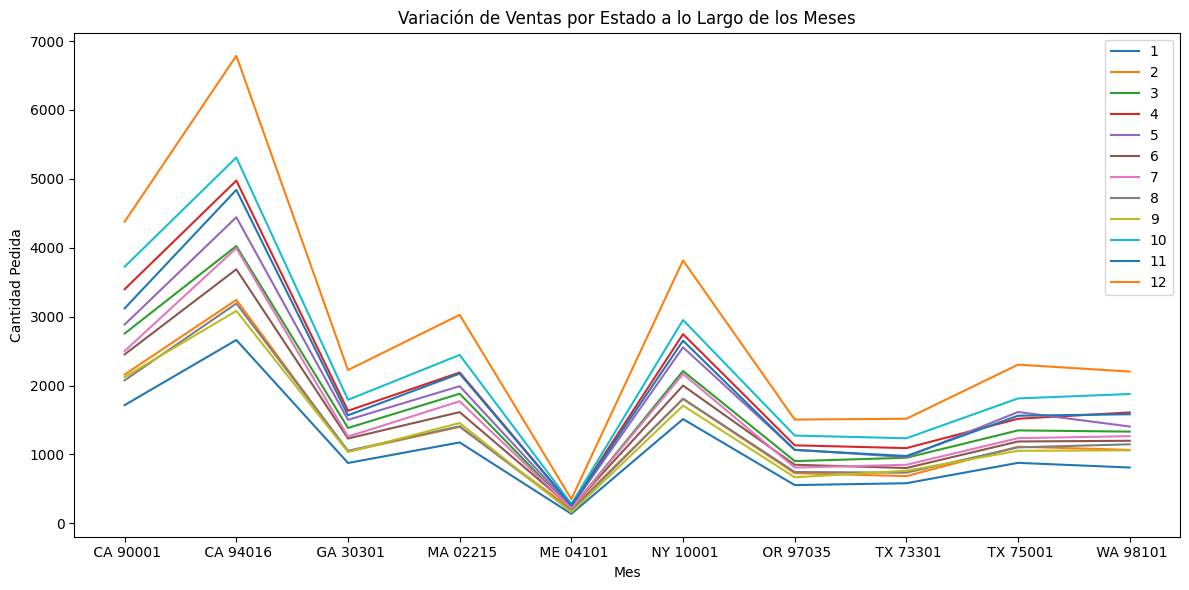

In [150]:
# Crear un DataFrame con todos los meses
dataframes_general = pd.concat(dataframes.values(), ignore_index=True)

# Recorremos los meses
for mes in meses:
    # Comporbamos si ese mes existe en el dataframe
    if mes in dataframes:
        df = dataframes[mes]
        df['Region'] = df['Dirección de Envio'].apply(lambda x: x.split(',', 2)[-1])
    else:
        print("El mes no existe")

# Crear un DataFrame con todos los meses
dataframes_general = pd.concat(dataframes.values(), ignore_index=True)

# Agregar una columna para el mes
dataframes_general['Mes'] = dataframes_general['Fecha de Pedido'].dt.month

# Agrupar por región y mes, sumando la cantidad pedida
ventas_por_region_mes = dataframes_general.groupby(['Region', 'Mes'])['Cantidad Pedida'].sum().unstack()

plt.figure(figsize=(12, 6))
for region in ventas_por_region_mes.columns:
    plt.plot(ventas_por_region_mes.index, ventas_por_region_mes[region], label=region)

plt.xlabel('Mes')
plt.ylabel('Cantidad Pedida')
plt.title('Variación de Ventas por Estado a lo Largo de los Meses')
plt.legend()
plt.xticks(ventas_por_region_mes.index)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# 4. Análisis del producto más vendido:

## ¿Cuál es el producto más vendido en general y en cada mes?

In [151]:
# juntamos todos los dataframe

dataframes_general = pd.concat(dataframes.values(), ignore_index=True)

#Buscamos el producto as vendido en general
dataframes_general.groupby('Producto', as_index=False)['Cantidad Pedida'].sum().sort_values(by='Cantidad Pedida', ascending=False).head(5)

,Producto,Cantidad Pedida
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557


In [152]:
#Agrupar produtos con cantidad de productos pedida
Productos_vendidos = df_ventas.groupby('Producto')['Cantidad Pedida'].sum()

# Ordenar de mayor a menor
Productos_vendidos_ordenados = Productos_vendidos.sort_values(ascending = False)

# Crear un nuevo DataFrame con los valores
df_Productos = pd.DataFrame({'Producto':Productos_vendidos_ordenados.index, 'Cantidad Pedida': Productos_vendidos_ordenados.values})

# Extraigo valores del dataFrame para realizar el grafico
Analisis_de_productos = df_ventas.groupby('Producto').agg({
    'Cantidad Pedida':'sum',
    'Precio Unitario': 'mean'
})

# Ordeno de mayor a menor
Analisis_de_productos = Analisis_de_productos.sort_values(by='Cantidad Pedida', ascending = False)


# Reseteo Indice
Analisis_de_productos = Analisis_de_productos.reset_index(inplace=False)

Analisis_de_productos.head(5)

,Producto,Cantidad Pedida,Precio Unitario
0,AAA Batteries (4-pack),1927,2.99
1,AA Batteries (4-pack),1773,3.84
2,USB-C Charging Cable,1594,11.95
3,Lightning Charging Cable,1433,14.95
4,Wired Headphones,1302,11.99


In [153]:
# Extraigo valores
Productos = Analisis_de_productos['Producto']
Unidades = Analisis_de_productos['Cantidad Pedida']
Precio = Analisis_de_productos['Precio Unitario']


# Crear el objeto figura
fig = go.Figure()

fig.add_trace(go.Bar(
        x = Productos,
        y= Unidades,
        name = 'Unidades Vendidas',
        marker = dict(color= 'Light Blue'),
        yaxis= 'y'
)
)

fig.add_trace(go.Scatter(
        x = Productos,
        y= Precio,
        name = 'Precio unitario',
        line = dict(color= 'Red',shape='spline',smoothing=1.3,width=3),
        yaxis = 'y2'
        )
)


fig.update_layout(
    title = 'Unidades Vendidas y Precios de productos',
    xaxis = dict(title='Productos'),
    yaxis = dict(title='Unidades',side='left'),
    yaxis2 = dict(title='Precio', overlaying= 'y',side='right'),
    yaxis_range = [0, max(Unidades)*1.1],
    yaxis2_range = [0, max(Precio)*1.1]
)

#### Análisis del producto más vendido según el mes

In [154]:
graficar_productos_vendidos(df_ventas_enero)
graficar_productos_vendidos(df_ventas_febrero)
graficar_productos_vendidos(df_ventas_marzo)
graficar_productos_vendidos(df_ventas_abril)
graficar_productos_vendidos(df_ventas_mayo)
graficar_productos_vendidos(df_ventas_junio)
graficar_productos_vendidos(df_ventas_julio)
graficar_productos_vendidos(df_ventas_agosto)
graficar_productos_vendidos(df_ventas_septiembre)
graficar_productos_vendidos(df_ventas_octubre)
graficar_productos_vendidos(df_ventas_noviembre)
graficar_productos_vendidos(df_ventas_diciembre)

## ¿Qué factores crees que han contribuido al éxito de ese producto en particular?

Comparando las características de los productos, junto con su valor por unidad y su volumen de ventas. Concluimos que los más populares son productos desechables y pequeños. Mientras que los menos populares son más caros, difíciles de desechar y más voluminosos.
Por lo que la adquisición de estos últimos es más medida y requiere de que los usuarios analicen sus necesidad y poder de adquisición. Mientras que las pilas, al ser un producto desechable y barato, no requiere de un análisis previo y es más fácil de consumir por los usuarios.


# 5. Tendencia ventas:

In [155]:
# Creo listas para almacenar los totales de ventas y los nombres de los meses
totales_ventas = []
nombres_meses = []

for mes in meses:
    dataframe_mes = dataframes[mes]
    dataframe_mes = extraer_datos(dataframe_mes)

    total_ventas_mes = dataframe_mes['Cantidad Pedida'].sum()
    totales_ventas.append(total_ventas_mes)
    nombres_meses.append(mes)

# Creo el objeto figura con el gráfico de barras
fig = go.Figure()

fig.add_trace(go.Bar(
    x=nombres_meses,
    y=totales_ventas,
    marker=dict(color=totales_ventas, colorscale = 'RdYlGn', colorbar=dict(title="Total de ventas", x=1.0, thickness=15)),  # Color y barra de colores
    text=totales_ventas,
    textposition='auto',  # Muestro el valor encima de las barras

))

# Configuro los ejes y los títulos
fig.update_layout(
    title="Total de ventas por mes",
    xaxis=dict(title="Mes"),
    yaxis=dict(title="Total de ventas"),
)

fig.show()

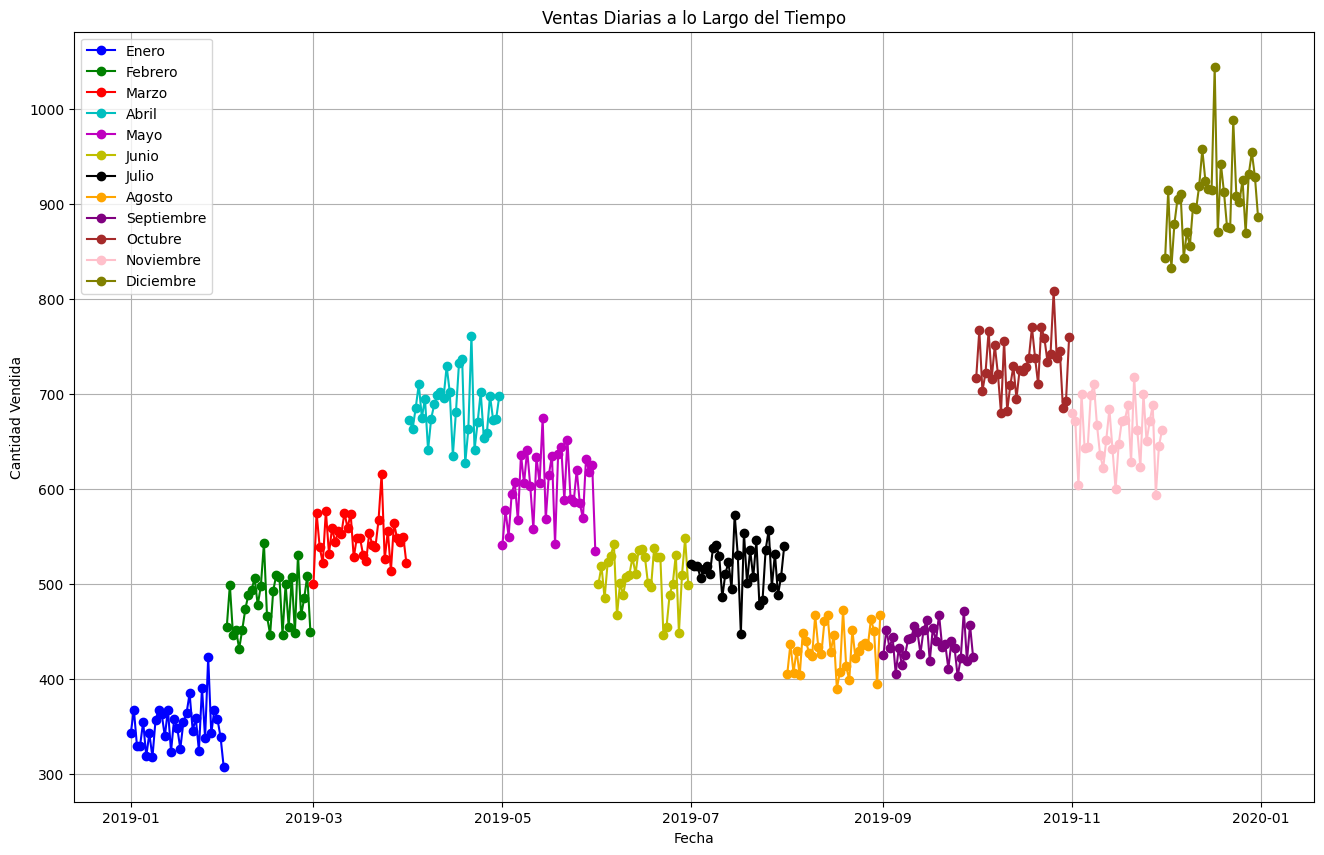

In [156]:
# Crear un DataFrame que contenga datos de todos los meses
dataframes_general = pd.concat(dataframes.values(), ignore_index=True)

# Crear una nueva columna para la fecha sin la hora
dataframes_general['Fecha'] = dataframes_general['Fecha de Pedido'].dt.date

# Lista para almacenar las series de tiempo de ventas diarias
ventas_diarias_por_mes = []

# Recorremos los meses
for mes in meses:
    # Comprobamos si ese mes existe en el dataframe
    if mes in dataframes:
        df = dataframes[mes]
        df['Fecha'] = df['Fecha de Pedido'].dt.date
        ventas_diarias = df.groupby('Fecha')['Cantidad Pedida'].sum()
        ventas_diarias_por_mes.append(ventas_diarias)
    else:
        print(f"El mes {mes} no existe")

# Crear un gráfico para todas las ventas diarias con colores por mes
plt.figure(figsize=(16, 10))

colores = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange','purple','brown', 'pink', 'olive']  # Lista de colores

for i, ventas_diarias in enumerate(ventas_diarias_por_mes):
    plt.plot(ventas_diarias.index[:-1], ventas_diarias.values[:-1], marker='o', linestyle='-', label=meses[i], color=colores[i])

plt.title('Ventas Diarias a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.grid(True)
plt.legend()  # Mostrar leyenda con nombres de los meses
plt.show()


# 6. Impacto de eventos especiales en las ventas: Conclusion

Lo que podemos concluir con los datos dados. Las tradiciones y hábitos tanto diarios como anuales no han tenido grandes cambios. A los consumidores se les es más fácil adquirir productos pequeños y desechables, y las compras de productos más costosos requieren de una indagación previa por parte de los usuarios. Generalmente estas compras se ven efectuadas cerca de fechas claves del año, donde los descuentos y festividades son más regulares.
